## Model building

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# import ML libraries
#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 

In [3]:
#import the data
spoofingData = pd.read_csv("payload_data_spoofing.csv")
spoofingData.drop('timestamp', axis=1, inplace=True)
spoofingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991371 entries, 0 to 991370
Data columns (total 9 columns):
data0    991371 non-null int64
data1    991371 non-null int64
data2    991371 non-null int64
data3    991371 non-null int64
data4    991371 non-null int64
data5    991371 non-null int64
data6    991371 non-null int64
data7    991371 non-null int64
flag     991371 non-null object
dtypes: int64(8), object(1)
memory usage: 68.1+ MB


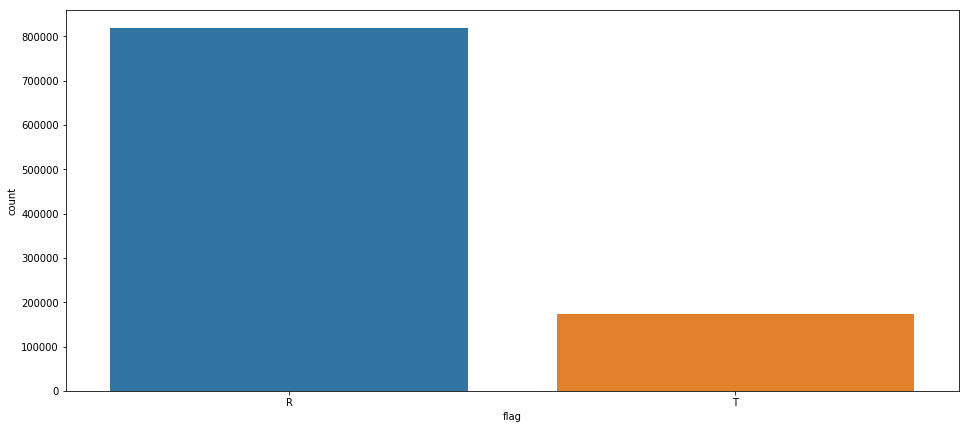

In [4]:
# class distribution
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("flag",data=spoofingData)

In [5]:
# convert R and T to 0 and 1
# Map flag fields into bool 
spoofingData['flag'] = spoofingData['flag'].map({'T':1, 'R':0})
spoofingData.head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0,0,0,0,16,41,42,36,0
1,21,0,0,0,0,0,0,0,0
2,5,32,68,104,119,0,0,126,0
3,0,32,0,0,0,0,0,0,0
4,16,64,96,255,120,196,8,0,0


In [7]:
spoofingData.to_csv("clean_payload_R.csv", index=False)

In [7]:
#Create data = x
Cls_X = spoofingData.copy()

#create target = Y
Cls_y = Cls_X.flag

print('X shape before ')
print(Cls_X.shape)

#drop the response column from the x dataset
Cls_X.pop('flag') #drop 'flag'

print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(991371, 9)
X shape after 
(991371, 8)
Y shape after 
(991371,)


In [8]:
# set seed
seed = 1000
#Split data to  into train and holding set.
X_train,X_test,y_train,y_test = train_test_split(Cls_X, Cls_y, test_size = 0.3, random_state = seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(693959, 8)
(693959,)
(297412, 8)
(297412,)


### KNN Classifier

In [9]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 3min 11s, sys: 1.9 s, total: 3min 13s
Wall time: 3min 14s


In [10]:
%%time
knn.score(X_test, y_test)

CPU times: user 5min 57s, sys: 2.08 s, total: 5min 59s
Wall time: 6min 1s


1.0

In [12]:
def getRandomList(n):
    data = []
    for i in range(n):
        data.append(np.random.randint(0,255))
    return data

randomPayload = pd.DataFrame.from_dict({"data0":[], "data1": [], "data2": [], "data3": [],
                             "data4": [], "data5": [], "data6": [], "data7": []})
for i in range(8):
    col = "data" + str(i)
    randomPayload[col] = getRandomList(1000)

In [13]:
knn.predict(randomPayload)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
testIntrusionPackets = X_test.iloc[np.where(y_test == 1)]

In [25]:
testIntrusionPackets.loc[:, ['data5', 'data6', 'data7']] = testIntrusionPackets.loc[:, ['data5', 'data6', 'data7']] + 10

/Users/Shravan/anaconda3/envs/deeplearning/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Shravan/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
testIntrusionPackets

,data0,data1,data2,data3,data4,data5,data6,data7
79703,1,69,96,255,107,20,20,20
228925,1,69,96,255,107,20,20,20
192610,1,69,96,255,107,20,20,20
874684,1,69,96,255,107,20,20,20
672473,1,69,96,255,107,20,20,20
945738,1,69,96,255,107,20,20,20
946081,1,69,96,255,107,20,20,20
390894,1,69,96,255,107,20,20,20
953678,1,69,96,255,107,20,20,20
305184,1,69,96,255,107,20,20,20


In [27]:
knn.predict(testIntrusionPackets)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
knn.predict(testIntrusionPackets.iloc[:10,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
testIntrusionPackets.loc[:, 'data5'] = testIntrusionPackets.loc[:, 'data5'] - 20

/Users/Shravan/anaconda3/envs/deeplearning/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [35]:
knn.predict(testIntrusionPackets.iloc[:10,:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
testIntrusionPackets.loc[:, 'data6'] = testIntrusionPackets.loc[:, 'data6'] + 100

/Users/Shravan/anaconda3/envs/deeplearning/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [39]:
knn.predict(testIntrusionPackets.iloc[:10,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Linear and Non-Linear classifiers

In [9]:
# model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# linear classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
# prepare models
models = []

# linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# non-linear
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [39]:
#Cls = spoofingData.copy()
Cls = spoofingDataWithRandomness.copy()
target_data=Cls.flag
Cls.pop('flag')
train_data=Cls

In [40]:
# evaluate each model in turn
results = {}
oofs = {}
scoring = 'roc_auc'
for name, model in models:
    print("Training model :" + name)
    kfold = KFold(n_splits=10, random_state=7)
    oofs[name] = np.zeros(Cls.shape[0])
    cvscores = []
    for train_idx, test_idx in kfold.split(Cls):
        model.fit(train_data.loc[train_idx], target_data.loc[train_idx])
        oofs[name][test_idx] = model.predict_proba(train_data.loc[test_idx])[:,1]
        print("Fold ROC score is %f" % roc_auc_score(target_data[test_idx],oofs[name][test_idx]))
        cvscores.append(roc_auc_score(target_data[test_idx],oofs[name][test_idx]))
    results[name] = cvscores 

Training model :LR
Fold ROC score is 0.978732
Fold ROC score is 0.985332
Fold ROC score is 0.976046
Fold ROC score is 0.977090
Fold ROC score is 0.983929
Fold ROC score is 0.982283
Fold ROC score is 0.980901
Fold ROC score is 0.983124
Fold ROC score is 0.980705
Fold ROC score is 0.129663
Training model :LDA
Fold ROC score is 0.990165
Fold ROC score is 0.994918
Fold ROC score is 0.990644
Fold ROC score is 0.991998
Fold ROC score is 0.993050
Fold ROC score is 0.991413
Fold ROC score is 0.988681
Fold ROC score is 0.994342
Fold ROC score is 0.989991
Fold ROC score is 0.497062
Training model :CART
Fold ROC score is 1.000000
Fold ROC score is 0.999989
Fold ROC score is 1.000000
Fold ROC score is 1.000000
Fold ROC score is 1.000000
Fold ROC score is 1.000000
Fold ROC score is 1.000000
Fold ROC score is 1.000000
Fold ROC score is 1.000000
Fold ROC score is 0.505787
Training model :NB
Fold ROC score is 0.976977
Fold ROC score is 0.974623
Fold ROC score is 0.973103
Fold ROC score is 0.970551
Fol

#### Using a random payload as test data

In [35]:
def getRandomList(n):
    data = []
    for i in range(n):
        data.append(np.random.randint(0,255))
    return data

randomPayload = pd.DataFrame.from_dict({"data0":[], "data1": [], "data2": [], "data3": [],
                             "data4": [], "data5": [], "data6": [], "data7": []})
for i in range(8):
    col = "data" + str(i)
    randomPayload[col] = getRandomList(100000)

In [36]:
randomPayload['flag'] = 1

In [37]:
spoofingDataWithRandomness = pd.concat([spoofingData, randomPayload])
spoofingDataWithRandomness.reset_index(inplace=True, drop=True)

In [38]:
spoofingDataWithRandomness

,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0,0,0,0,16,41,42,36,0
1,21,0,0,0,0,0,0,0,0
2,5,32,68,104,119,0,0,126,0
3,0,32,0,0,0,0,0,0,0
4,16,64,96,255,120,196,8,0,0
5,255,0,0,0,255,196,8,0,0
6,5,33,104,9,33,33,0,112,0
7,254,80,0,0,0,60,0,0,0
8,0,0,0,0,0,6,11,112,0
9,0,33,16,255,0,255,0,0,0


In [26]:
def getRandomList(n):
    data = []
    for i in range(n):
        data.append(np.random.randint(0,255))
    return data

anotherRandomPayload = pd.DataFrame.from_dict({"data0":[], "data1": [], "data2": [], "data3": [],
                             "data4": [], "data5": [], "data6": [], "data7": []})
for i in range(8):
    col = "data" + str(i)
    anotherRandomPayload[col] = getRandomList(1000)

In [27]:
anotherRandomPayload

,data0,data1,data2,data3,data4,data5,data6,data7
0,132,166,181,188,48,65,34,95
1,116,185,58,112,97,60,189,14
2,81,79,231,21,242,197,45,6
3,201,172,161,221,129,9,9,220
4,79,178,226,203,136,168,207,33
5,245,61,126,244,135,133,213,163
6,14,174,19,138,171,223,202,56
7,214,38,167,26,34,76,220,15
8,16,65,252,179,69,37,72,188
9,141,112,52,193,40,210,100,236
